## Convnet Blabla

Les convnet (ou réseau neuronaux convolutions) forment une grande famille de modèle. Nous commençons par présenter l'architecture de l'ancètre des convnet, simplement batisé **LeNet**, inventé par la fameuse équipe: Le Cun, Bottou,  Bengio, Haffner en 1998.

### Description



Le principe d'un convnet et d'enchainer des convolutions d'images.  Par exemple:

* On part d'une image avec 3 channel (l'entrée)
* Par des convolutions on obteint une image avec 30 channels: chaque pixel est une neurone de la première couche.
* Par de nouvelles convolutions on obtien une image avec 60 channels: chaque pixel est une neurone de la seconde couche.
* etc.

Imaginons que les noyaux de convolutions on des tailles $3\times 3$.  

* Ainsi, chaque neurone de la première couche est connecté à $3\times 3$ pixels de l'image originale
* chaque neurone de la seconde couche est indirectement connecté à $?\times ?$ pixels de l'image originale.  
Calculez  $(1\heartsuit)$ en vous aidant du dessin ci-dessous.
* etc

Ce processus d'élargissement du champs de vision dans les différentes couche de neurone a aussi été observé dans le cerveau humain (cf. texte en anglais à la suite).


Grâce à cette architecture

* le réseau  se concentrer sur les motifs de bas niveau dans les premieres couches (ex: détection de contours)
* puis il les assemble en des modtifs de haut niveau dans les couches élevée.

Cette structure hierarchique se retrouve naturellement dans les images issues de la nature. C'est une des raisons pour laquel les réseau convolutifs sont si efficaces pour analyser des images.

    !git clone https://github.com/vincentvigon/assets_neurone

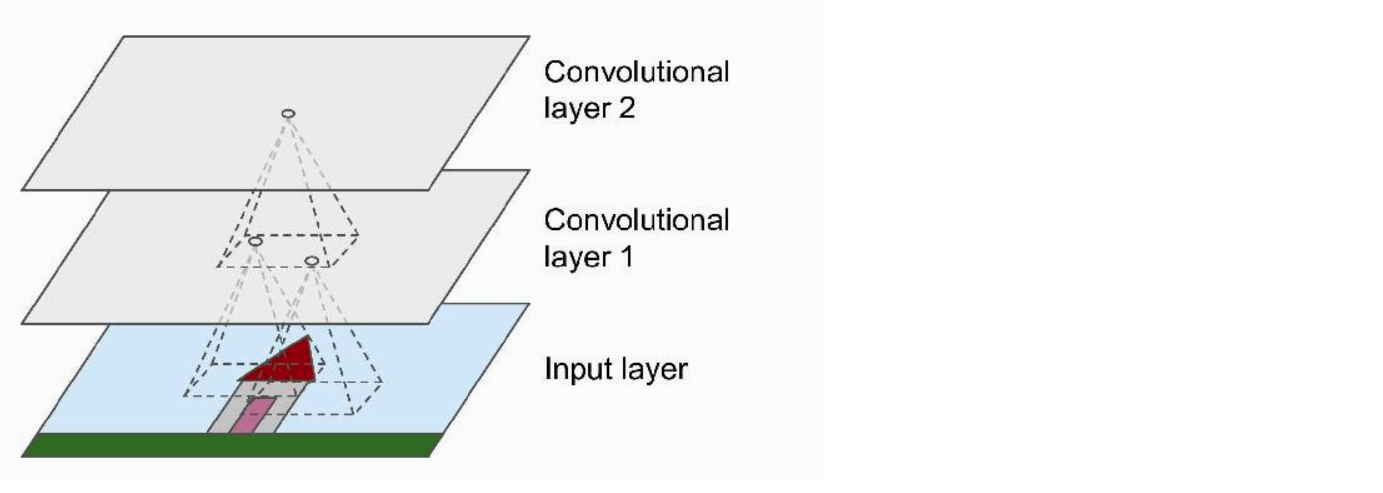

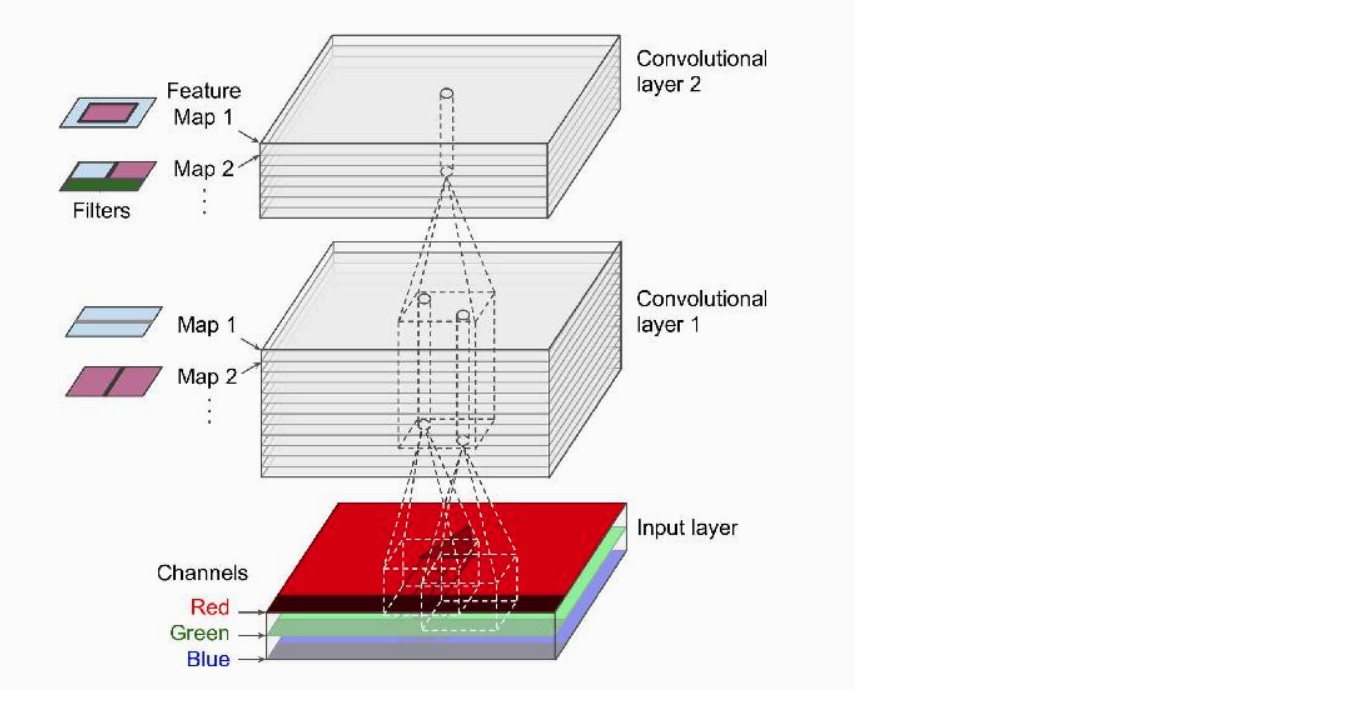

Après chaque convolution on ajoute une fonction d'activation non linéaire (le plus souvent `relu`).



Et entre lcertaines couches de convolutions,  on ajoute des couches  de max pooling qui réduisent la taille spaciale des images:

* On réduit ainsi le nombre de paramètres, ce qui diminue le sur-apprentissage
* Chaque neurone après un max-polling 2*2 a un champs de vision deux fois  plus étendu sur l'image initiale. De plus ils ne retiennent que l'essentiel (à cause du max).  

Par contre, à chaque max-pooling on se permet d'augmenter le nombre de cannaux. Les layers ont ainsi plus de "couleur" pour se représenter les caractérisitques  importantes de l'image.

**Vocabulaire:** Les images multi-channel produites de couche en couche sont  appelées *feature maps*. Mais on utilise aussi le mot *feature* pour désigner les input (=les descripteurs).


La fin d'un convnet est consituée d'une ou de plusieurs couches denses (fully connected) qui synthétisent les ultimes features  pour les transformée en un vecteur de probabilité, correspondant au classes que l'on veut prédire.  

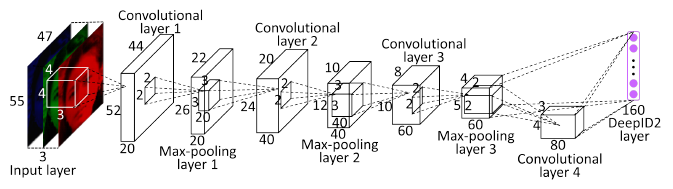

***A vous:***  Le dessin ci-dessus représente un convnet  (une variante de celui qu'on implantera plus loin).  

*  La taille successive des couches de neurones  est clairement écrite sur le dessin.
* $(2\heartsuit)$ Indiquez précisément quelle est la taille des noyaux de convolutions `W` entre chacune des couches. Attention, il y a aussi des opérations de max-pooling indiquées. Précisez quel est le padding et les stride utilisée.  
*  $(2\heartsuit)$ Calculer la dimension de l'ultime matrice `W` qui permet d'obtenir un vecteur de 160 classes. Comparez la taille de cette matrice avec celle des noyaux de convolutions précédent.  

### L'architecture du cortex visuel


David H. Hubel et Torsten Wiesel ont réalisé une série d'expériences sur des chats en 1958 et 1959 (et quelques années plus tard sur des singes), donnant des indications cruciales sur la structure du cortex visuel (les auteurs ont reçu le prix Nobel de physiologie ou médecine en 1981 pour leurs travaux). Ils ont notamment montré que de nombreux neurones du cortex visuel ont un petit champ réceptif local, ce qui signifie qu'ils ne réagissent qu'à des stimuli visuels situés dans une région limitée du champ visuel. Les champs réceptifs de différents neurones peuvent se chevaucher, et ensemble ils tuilent l'ensemble du champ visuel. En outre, les auteurs ont montré que certains neurones ne réagissent qu'aux images de lignes horizontales, tandis que d'autres ne réagissent qu'aux lignes ayant des orientations différentes (deux neurones peuvent avoir le même champ réceptif mais réagir à des orientations de lignes différentes). Ils ont également remarqué que certains neurones ont des champs réceptifs plus larges et qu'ils réagissent à des motifs plus complexes qui sont des combinaisons de motifs de niveau inférieur. Ces observations ont conduit à l'idée que les "neurones" de niveau supérieur sont basés sur les sorties des neurones voisins de niveau inférieur. Cette architecture puissante est capable de détecter toutes sortes de motifs complexes dans n'importe quelle zone du champ visuel.


Ces études du cortex visuel ont inspiré le néocognitron, introduit en 1980, qui a progressivement évolué vers ce que nous appelons aujourd'hui les réseaux neuronaux convolutifs. Une étape importante a été franchie en 1998 avec l'article de Yann LeCun, Léon Bottou, Yoshua Bengio et Patrick Haffner, qui a présenté la célèbre architecture LeNet-5, largement utilisée pour reconnaître les numéros de chèques manuscrits.

## Préparation des données


Nous allons recharger le jeu de données MNIST. Le but est de crée un réseau de neurones classificateur classifiant chacune des images dans l'une des 10 classes possibles.


In [1]:
import tensorflow as tf
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.set_default_device("cuda")
#et si on veut changer de dtype:
#torch.set_default_dtype(torch.float64)

In [3]:
def make_data():
    (x_train_val, y_train_val), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    n_val=int(0.2*len(x_train_val))
    X={"test":x_test}
    Y={"test":y_test}

    X["train"]=x_train_val[n_val:]
    X["val"]=x_train_val[:n_val]

    Y["train"]=y_train_val[n_val:]
    Y["val"]=y_train_val[:n_val]

    for key in ["train","val","test"]:
        Y[key]=torch.tensor(Y[key])


    def change_x(x):
        x=torch.tensor(x,dtype=torch.get_default_dtype())
        x=x/255
        x=x[:,:,:,None]
        x=torch.permute(x,[0,3,1,2])
        return x

    for key in ["train","val","test"]:
        X[key]=change_x(X[key])

    return X,Y

X,Y=make_data()

***A vous:*** Pourquoi fait-on subir `change_x()` aux images $(1\heartsuit)$?

In [4]:
for key,val in X.items():
    print(f"{key}, {val.shape}, {val.dtype}")

In [5]:
for key,val in Y.items():
    print(f"{key}, {val.shape}, {val.dtype}")

In [6]:
ni=5
nj=5
fig,axs=plt.subplots(ni,nj,sharex="all",sharey="all",figsize=(2*nj,2*ni))
for i in range(ni):
    for j in range(nj):
        axs[i,j].imshow(X["train"][i*nj+j,0,:,:].cpu())
        axs[i,j].set_title(f"label:{Y['train'][i*nj+j]}")
fig.tight_layout()

In [7]:
"""  distributeur de donnée par batch.   """
def oneEpoch(x,y,batch_size,nb_batches=None):

    if nb_batches is None:
        nb_batches=len(x)//batch_size

    assert batch_size*nb_batches<=len(x), "pas assez de données"

    shuffle_index=np.random.permutation(len(x))
    x=x[shuffle_index]
    y=y[shuffle_index]

    for i in range(nb_batches):
        yield x[i*batch_size:(i+1)*batch_size],y[i*batch_size:(i+1)*batch_size]


***A vous:*** Avec l'argument par défaut `nb_batches=None`,  est-ce que toutes les données passent en une `epoch` $(1\heartsuit)$?

In [8]:
"petit test"
for x,y in oneEpoch(X['train'], Y['train'],batch_size=2,nb_batches=3):
    print("x.shape:",x.shape,x.dtype)
    print("y:",y.shape,y.dtype)
    print("")

## Le modèle

In [9]:
class ModelConv(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=torch.nn.Conv2d(1,32,5,padding="same")
        self.conv2=torch.nn.Conv2d(32,64,5,padding="same")

        self.dense1=torch.nn.Linear(64*7*7, 1024)
        self.dense2=torch.nn.Linear(1024, 10)

        self.maxPool=torch.nn.MaxPool2d(2)



    def forward(self,X):

        #X.shape= (b,1,28,28)
        b=X.shape[0]
        act_fn=torch.relu

        X=act_fn(self.conv1(X))     #(b,32,28,28)

        X=self.maxPool(X)           #(b,32,14,14)

        X=act_fn(self.conv2(X))     #(b,64,14,14)

        X=self.maxPool(X)           #(b,64,7,7)

        X=torch.reshape(X,[b,64 * 7 * 7])   #(b,64*7*7)

        X=act_fn(self.dense1(X))           #(b,1024)

        #attention, en torch, la fonction softmax est inclue dans la loss cross-entropique
        X=self.dense2(X)    #(b,10)

        return X


def test():
    X=torch.ones([3,1,28,28])
    model=ModelConv()
    Y=model(X)
    print(Y.shape)
test()

### Le même en padding=valid

#### →♡♡♡

Complétez la méthode `__init__` puis ajouter la méthode forward avec des commentaires pour préciser les shapes à chaque étape.

In [10]:
class ModelConv_valid(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=torch.nn.Conv2d(1,32,5)
        self.conv2=torch.nn.Conv2d(32,64,5)

        self.dense1=torch.nn.Linear(???, 1024)
        self.dense2=torch.nn.Linear(1024, 10)

        self.maxPool=torch.nn.MaxPool2d(2)




In [11]:
def test():
    X=torch.ones([3,1,28,28])
    model=ModelConv_valid()
    Y=model(X)
    print(Y.shape)
test()

    torch.Size([3, 10])

## Entrainement

### Un agent

In [12]:
import copy
class Agent:

    def __init__(self,model):
        self.loss_fn = torch.nn.CrossEntropyLoss()
        self.model = model
        self.batch_size=32
        learning_rate=1e-3

        self.X_train=X['train']
        self.Y_train=Y['train']
        self.X_val=X['val']
        self.Y_val=Y['val']

        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=learning_rate)
        self.losses=[]
        self.val_steps=[]
        self.val_losses=[]
        self.step_count=-1


    def train_step(self,x,y):
        pred = self.model(x)
        loss = self.loss_fn(pred,y)

        loss.backward()
        self.optimizer.step()
        self.optimizer.zero_grad()

        return loss


    def val_step(self,x,y):
        with torch.no_grad():
            pred = self.model(x)
            loss = self.loss_fn(pred,y)
        return loss


    def train(self,nb_epochs):
        for _ in range(nb_epochs):
            for x,y in oneEpoch(self.X_train,self.Y_train,self.batch_size):
                self.step_count+=1
                loss=self.train_step(x,y)
                self.losses.append(loss.detach().cpu().item())

            val_loss=self.val_step(self.X_val,self.Y_val).cpu().item()
            self.val_losses.append(val_loss)

            if val_loss<=np.min(self.val_losses):
                print(f"⬊{val_loss:.4g}",end="")
                self.best_weights=copy.deepcopy(self.model.state_dict())
            else:
                print("⬈",end="")

            self.val_steps.append(self.step_count)

    def set_model_at_best(self):
        self.model.load_state_dict(self.best_weights)

Comme on a fait un `torch.set_defaultdevice("cuda")` il n'est pas nécessaire d'écrire

    model=model.to("cuda")

In [13]:
%%time
model=ModelConv()
agent=Agent(model)
agent.train(10)

In [14]:
fig,ax=plt.subplots()
ax.plot(agent.losses)
ax.plot(agent.val_steps,agent.val_losses,"r.")
ax.set_yscale("log");

***A vous:*** Observez l'influence du batch_size sur le temps de l'entrainement.

### Calculons l'accuracy

In [15]:
agent.set_model_at_best()

In [16]:
Y_pred_proba=agent.model(X['test'])
Y_pred_proba.shape

In [17]:
Y_pred=torch.argmax(Y_pred_proba,dim=1)
Y_pred.shape

In [18]:
torch.mean((Y_pred==Y['test']).to(torch.float32))

### A vous de jouer avec CIFAR10

Classifiez les images de Cifar10 en utilisant uniquement tensorflow.



#### →♡♡♡♡

In [19]:
(x_train_color, y_train_color), (x_test_color, y_test_color) = tf.keras.datasets.cifar10.load_data()

In [20]:
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

fig,axs=plt.subplots(10,10,figsize=(10,10))
axs=axs.reshape(-1)

for ax in axs:
    i=np.random.randint(50000)
    ax.imshow(x_train_color[i,:,:])
    ax.axis("off")
    ax.set_title(class_names[y_train_color[i,0]])

fig.tight_layout()

## Lutter contre le sur-apprentissage

### principe



Sur la courbe de loss, on voit clairement qu'il y a du sur-apprentissage: la courbe `train` est bien en dessous de la courbe `valid`;  en fait, cela oscile d'un époque à l'autre. Cela indique que notre modèle a une grande variance.


La solution la plus efficace pour limiter le sur-apprentissage dans les réseaux de neurones est le 'dropout'. Cela consiste à geler une partie aléatoire des neurones de certaines couches. Par exemple, supposons que l'on ai une couche de neurone `Y`. Faire l'opération:

    Z = Dropout(0.25)(Y)

signifie que l'on choisi un ensemble aléatoire d'indice $J$, dont la taille est de 25%  de la taille de $Y$,  et que l'on pose:
$$
 Z_j =
 \begin{cases}
  0 \text{ si } j \in J\\
  Y_j \text{ si } j \notin J
 \end{cases}
$$
La conséquence est que les gradients des paramètres conduisants à $J$ vont s'annuler, et donc ces paramètres ne seront pas impactés lors de la descente de gradient.  Détaillons cela sur un exemple très simple.

Commençons par décrire un début de modèle sans sans dropout:  il consiste en une série de transformation:
$$
X  \stackrel {W}  \longrightarrow Y \stackrel {h}  \longrightarrow E
$$
L'entrée est $X$. On fait ensuite une multiplication matricielle: $Y= XW$. Puis on fait toute sorte de transformation, puis on calcul l'erreur, et tout cela, on l'appelle $h$.






Intéressons nous au calcul de la dérivée de l'erreur $E$ suivant le coefficient $W_{ij}$. Puisque:
$$
Y_j = \sum_a X_a W_{aj}
$$
On a
$$
\frac{\partial Y_k}{\partial  W_{i j}} = X_{i} 1_{j=k}
$$
Et
$$
\frac{\partial E}{\partial W_{i j}} =\sum_k \frac{\partial E}{\partial Y_k}  \frac{\partial Y_k}{W_{i j}} = \frac{\partial E}{\partial Y_j}  \frac{\partial Y_j}{W_{i j}}
$$
En particulier quand vient la descente de gradient, la quantité ci-dessus est soustraite à $W_{ij}$.


Supposons maintenant que nous ajoutons un dropout:
$$
X  \stackrel {W}  \longrightarrow Y  \stackrel {dropout}  \longrightarrow   Z \stackrel {h}  \longrightarrow E
$$
La dérivée devient:
$$
\frac{\partial E}{\partial W_{i j}} = \frac{\partial E}{\partial Y_j}  \frac{\partial Y_j}{W_{i j}} 1_{j\notin J}
$$
Ainsi, pour tous les $j\in J$, la dérivée s'annule, et les poids correpondant $ W_{i j}$ resteront inchangées lors d'une itération de la descente de gradient.  


D'une itération à l'autre, les input-ouput changent, et l'ensemble $J$ change. Différentes parties du réseaux sont nouris avec différentes données.

Pour faire une analogie avec le cerveau humain: quand un enfant apprend à parler, il reçoit des tas d'informations orales, mais il est aussi en permance distrait par des stimuli variés (son hochet). Il apprend bien à parler mais sans rien apprendre par coeur.


### Compensation



En fait le dropout est légèrement plus compliqué que ce que nous avons expliqué précédemment:

Le dropout ne doit être effectuée que lors de la phase d'apprentissage: par la suite, quand on utilise le réseau bien entrainé, il serait dommage de laisser de côté 25% des neurones d'une couche.

Mais cela pose un problème: lors de l'entrainement,
quand on met à zéro 25% des neurones d'une couche, la quantité de signal à la sortie de la couche est en moyenne diminuée de 25%. C'est généant, car, en phase de test, le signal ne sera pas dimuné de 25%: il aura donc tendance à saturer les connections (n'oublions pas qu'il y a des fonctions d'activation après chaque couche).

Pour résoudre ce problème, l'opération

    Z = Dropout(q)(Y)

se traduit en fait par:
$$
 Z_j =
 \begin{cases}
  0 \text{ si } j \in J\\
  \frac 1 {1-q} Y_j \text{ si } j \notin J
 \end{cases}
$$
Par exemple si $q=0.75$, à la sortie, les parties non mises à zéro seront multiplées par 4 pour que le signal conserve son "amplitude".

***Remarque:*** On aurait peu aussi diminuer le signal durant la phase test. Mais c'est une moins bonne idée, car on souhaite que le réseau soit le plus rapide possible durant la phase d'exploitation (=la phase "test").


### implémentation

In [23]:
"fonctions utilitaires"
def plot_images(images,vmin=None,vmax=None):

    batch_size,n_channel,_,_=images.shape


    fig,axs=plt.subplots(batch_size,n_channel,figsize=(2*n_channel,2*batch_size))
    axs=axs.reshape([batch_size,n_channel])#au cas une des quantité vaut 1
    vmin=torch.min(images) if vmin is None else vmin
    vmax=torch.max(images) if vmax is None else vmax

    for i in range(batch_size):
        for j in range(n_channel):
            axs[i,j].imshow(images[i,j,:,:].cpu(), interpolation="nearest",vmin=vmin,vmax=vmax)
            if j==0:
                axs[i,j].set_ylabel(f"{i}-ième image")
            if i==0:
                axs[i,j].set_title(f"{j}-ième channel")
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])

    fig.tight_layout()

In [24]:
input = torch.randn(1, 16, 10, 10)
plot_images(input,0,1)

In [25]:
droupout_fn=torch.nn.Dropout(p=0.7)
output=droupout_fn(input)
plot_images(output,0,1)

In [26]:
droupout2d_fn = torch.nn.Dropout2d(p=0.7)
output = droupout2d_fn(input)
plot_images(output,0,1)

In [27]:
output = droupout2d_fn(input)
plot_images(output,0,1)

#### →♡♡

Quelle est ladifférence entre le droupout simple et le droupout 2d ?

**Réponse:**



## Mémoire requise et nombre de calcul

Un  problème avec les CNN est que les couches convolutionnelles nécessitent une énorme quantité de RAM, surtout pendant l'entraînement, car le passage backward nécessite le stockage de toutes les valeurs intermédiaires calculées pendant le passage foreward.

Par exemple, considérons un layer de convolution (`Conv2D`) paramétrée par un kernel de shape:

    W.shape = (n_channel_out,n_channel_in,height,width) = (200, 3 ,5 , 5 )

Le nombre de paramètre est donc de:

    (5 × 5 × 3 + 1) × 200

(le +1 correspond aux ...).

Avec en entrée une image de taille 150*100, cette convolution produit un volume de neurones de taille 150 × 100 × 200.

Chacun de ces neurones doit calculer une somme pondérée de 5 × 5 × 3 = 75 entrées.

Ainsi le nombre de multiplication à effectuer est de

    150 × 100 × 200 × 75 = 225 millions

De plus, si vous travailler en 32 bits, alors ce volume de neurone occupera

    200 × 150 × 100 × 32 = 96 millions de bits

Soit

    12 Mo de RAM.

Et ce n'est que pour un élément du batch. Si un batch contient 100 instances, cette couche utilisera plus de 1 Go de RAM!

En phase d'évaluation (=de test) la mémoire vive occupée par une couche peut être libérée dès que la couche suivante a été calculée.

Mais pendant l'entrainement, tout ce qui a été calculé pendant le passage foreward doit être conservé pour le passage backward.


***Astuce*** Si l'entrainement échoue à cause d'un dépassement de mémoire:
* vous pouvez essayer de réduire la taille des batch (pensez à modifier le learning rate du coup).
* Vous pouvez également essayer de réduire la dimension en utilisant un stride>1  
* supprimer quelques couches.
* Ou vous pouvez essayer d'utiliser des flotant de 16 bits au lieu de 32 bits.
* Vous pouvez également changer de matériel: utiliser plusieurs GPU, payer un abonnement à colab-pro, aller voir les différentes solutions de cload-computing qui existent.
* Dans les notebook, la RAM peut être saturée par des cellules plus anciennes. N'hésitez pas à relancer votre notebook depuis la cellule courante. Si vous avez enregistrer les données sur le disque, rien n'est perdu.
